In [3]:
import pandas as pd
import numpy as np
import statistics as st
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
import seaborn as sns
import matplotlib as plt
import pylab
import re
%matplotlib inline 

#参考（https://www.kaggle.com/dashaaa/titanic-solutions-python）

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

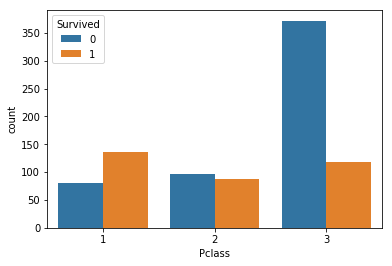

In [6]:
pl_class = sns.countplot('Pclass', data=train, hue='Survived')

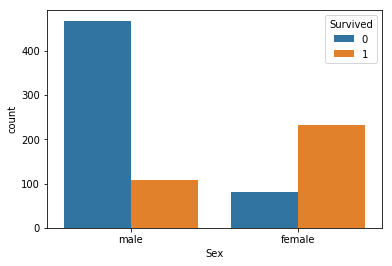

In [7]:
pl_sex = sns.countplot('Sex', data=train, hue='Survived')

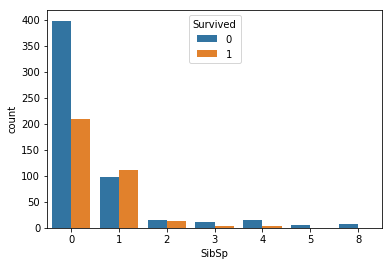

In [8]:
pl_SibSp = sns.countplot('SibSp', data=train, hue='Survived')

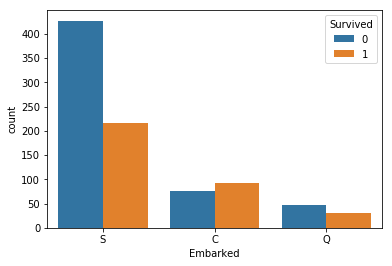

In [9]:
pl_embarked = sns.countplot('Embarked', data=train, hue='Survived')

In [10]:
train['Embarked'].isnull().sum()

2

In [11]:
train['Embarked'].fillna('S', inplace=True)

In [12]:
train['Embarked'].isnull().sum()

0

In [13]:
train['Fare'].sum()

28693.9493

In [14]:
#New dataset
d=train[['Pclass', 'Fare']]
d_test = test[['Pclass', 'Fare']]

fc = d.groupby(['Pclass']).mean()

fc_test=d_test.groupby(['Pclass']).mean()

In [15]:
#aに0のFareを格納する！
a=train['Fare']==0
a.sum()

15

In [16]:
#PclassとFare==0で場合分け！
#Pclass == 1
a = (train['Pclass']==1) & (train['Fare']==0)
df=train[a]
#平均を打ち込む
df['Fare'] = 84.154687
train[a]=df

#Pclass == 2
b = (train['Pclass'] == 2) & (train['Fare'] == 0)
df1=train[b]
df1['Fare']=20.662183
train[b]=df1

#Pclass == 3
c = (train['Pclass'] == 3) & (train['Fare'] == 0)
df2=train[c]
df2['Fare']=13.675550
train[c]=df2

/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [17]:
#Confirm
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,84.154687,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,84.154687,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,84.154687,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,84.154687,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,84.154687,NaN,S


In [18]:
#test dataも同様
a_test = (test['Pclass'] == 1) & (test['Fare'] == 0)
df_test=test[a_test]
df_test['Fare']=94.280297
test[a_test]=df_test

b_test = (test['Pclass'] == 2) & (test['Fare'] == 0)
df1_test=test[b_test]
df1_test['Fare']=22.202104
test[b_test]=df1_test

c_test = (test['Pclass'] == 3) & (test['Fare'] == 0)
df2_test=test[c_test]
df2_test['Fare']=12.459678
test[c_test]=df2_test

/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [19]:
#Confirm
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,94.280297,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,94.280297,B52 B54 B56,S


In [20]:
test['Fare'].isnull().sum()

1

In [21]:
index = test['Fare'].index[test['Fare'].apply(np.isnan)]
index
#test['Fare'][152]がnanらしい

Int64Index([152], dtype='int64')

In [22]:
fc_test

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [23]:
#nanにPclass3の平均を打ち込む
test['Fare'].values[152] = fc_test['Fare'].values[2]

In [24]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [25]:
#Nameを大まかに分類したい
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [26]:
#大まかにMrsで分類してみる。適当にMrsでも格納しておく。
train['Title'] = 'Mrs'
test['Title'] = 'Mrs'

In [27]:
#group() 正規表現にマッチした文字列を返す。group()がマッチした文字列の取得。\.はカンマまでという意味
for i in range(len(train['Name'])):
    train['Title'].values[i-1]= re.search('([A-Za-z]+)\.', train['Name'].values[i-1]).group()
for i in range(len(test['Name'])):
    test['Title'].values[i-1]= re.search('([A-Za-z]+)\.', test['Name'].values[i-1]).group()
    
#train['Title'].values[i-1]= re.search('([A-Za-z]+)\.', train['Name'].values[i-1]).group()とは、
#train['Name']を調べ、「英文字A-Za-zから始まり.で終わる」の塊を格納する



In [28]:
len(train['Name'])

891

In [29]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.


In [30]:
#次にAgeについて
age  =train[['Title', 'Age']]
age_test = test[['Title', 'Age']]

In [31]:
age1 = age.groupby(['Title']).mean()
age1_test = age_test.groupby(['Title']).mean()

# 

In [32]:
age1

,Age
Title,
Capt.,70.000000
Col.,58.000000
Countess.,33.000000
Don.,40.000000
Dr.,42.000000
Jonkheer.,38.000000
Lady.,48.000000
Major.,48.500000
Master.,4.574167


In [33]:
#AgeのNan値に、それぞれTitleごとの平均を割りあてる！ （('Title')['Age']は上のDataFrame)
train['Age'].fillna(train.groupby('Title')['Age'].transform('mean'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('mean'), inplace=True)


In [34]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,NaN,Q,Mr.
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Mr.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs.
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs.


In [35]:
#一応参考までに
re.search('([A-Za-z]+)\.', "Braund, Mr. Owen Harris").group()

'Mr.'

In [36]:
#sibsp 乗船していた兄弟または配偶者の数, parch 乗船していた親または子どもの数
train['Family']=train['SibSp']+train['Parch']
train['family_is']='0'

#家族がいる（一人で来てない）場合には１をfamily_isに格納する！
var = (train['Family'] > 0)
df_var=train[var]

for i in range(len(df_var['Family'])):
        df_var['family_is'].values[i-1] = '1'

train[var]=df_var

In [37]:
#family_is が１のみ！
train[var]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,family_is
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Master.,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Mrs.,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Mrs.,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S,Miss.,2,1
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,NaN,S,Mr.,6,1
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,NaN,Q,Master.,5,1
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.000000,1,0,345763,18.0000,NaN,S,Mrs.,1,1


In [38]:
#testも同様！
test['Family']=test['SibSp']+test['Parch']
test['family_is']='0'
var1 = (test['Family'] > 0)
df_var1=test[var1]

for i in range(len(df_var1['Family'])):
        df_var1['family_is'].values[i-1] = '1'

test[var1]=df_var1

In [39]:
#Cabinをなんとかしたい！
test['Cabin'].isnull().sum()

327

In [40]:
test['cabin_is']='1'
var2 = (test['Cabin'].isnull())
df_var2=test[var2]

#Cabinのnull値に、Cabin_isへ０を割りあてる！(わかっているものはそのまま１)
for i in range(len(df_var2['Cabin'])):
        df_var2['cabin_is'].values[i-1] = '0'

test[var2]=df_var2

In [41]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,family_is,cabin_is
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,Mr.,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Mrs.,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Mr.,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Mr.,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Mrs.,2,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,NaN,S,Mr.,0,0,0
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,NaN,Q,Miss.,0,0,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,NaN,S,Mr.,2,1,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,NaN,C,Mrs.,0,0,0
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,NaN,S,Mr.,2,1,0


In [42]:
# trainも同様！
train['cabin_is']='1'
var3 = (train['Cabin'].isnull())
df_var3=train[var3]

for i in range(len(df_var3['Cabin'])):
        df_var3['cabin_is'].values[i-1] = '0'

train[var3]=df_var3

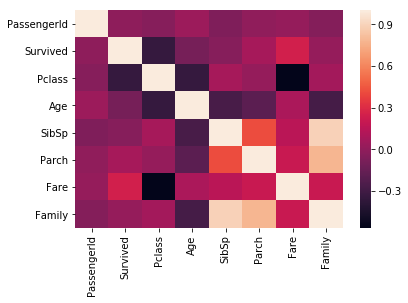

In [43]:
#図で確認しておく！
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [44]:
#Sexをそれぞれ0と１に置き換える！
train = train.replace("male", 0).replace('female',1)
test = test.replace("male", 0).replace('female',1)

In [45]:
#trainのSurvivedを抜き出す！
train_survived=pd.DataFrame(train['Survived'])

#trainとtestから学習に使うデータを抜き出す！
train_f=train[['Pclass','Sex','Age', 'Fare', 'family_is','cabin_is']]
test_f=test[['Pclass','Sex','Age', 'Fare', 'family_is','cabin_is']]

In [46]:
#trainで学習を試してみる！どのくらいマッチするのか！？
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)
results = cross_val_score(rfc, train_f, train_survived['Survived'], cv=skf)
results.mean()*100

80.91743099744768

In [47]:
#testを使う！ (失敗した！！！！)
parameters = {'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20], "min_samples_split": [6, 8, 10]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
rf=gcv.fit(train_f, train_survived['Survived'])
pred_test=rf.predict(test_f)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   23.9s finished


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [48]:
#なんかtestの方のAgeに一つnullが見つかったので、適当に平均でも入れておくことにした
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [49]:
#testを使う！
parameters = {'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20], "min_samples_split": [6, 8, 10]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
rf=gcv.fit(train_f, train_survived['Survived'])
pred_test=rf.predict(test_f)

#test_fを入れ直してなかった！！

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   23.8s finished


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [50]:
test_f=test[['Pclass','Sex','Age', 'Fare', 'family_is','cabin_is']]

In [51]:
#これでOKだろ！！！！
test_f.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
family_is    0
cabin_is     0
dtype: int64

In [52]:
#testを使う！
parameters = {'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20], "min_samples_split": [6, 8, 10]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
rf=gcv.fit(train_f, train_survived['Survived'])
pred_test=rf.predict(test_f)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   23.5s finished


In [53]:
pred_test

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
len(pred_test)

418

In [54]:
#kaggle提出の形にする！test.csvにsurvivedの欄を作り、そこに今までに作った学習データを組み込む！
df_out = pd.read_csv("test.csv")
df_out["Survived"] = pred_test

In [55]:
#保存！
df_out[["PassengerId","Survived"]].to_csv("submission.csv",index=False)

In [56]:
df_out.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
